# Position of a star

You measure the position of a quasar N times with the same telescope i.e. errors are homoscedastic. Let's say the underlying process is Gaussian, the true position is $\mu = 1$ (in suitable units), and the erorrs are $\sigma = 0.2$

In [318]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## Part 1

- Generate fake measurements. Treat each of these observations as an estimate of the true distribution. So we'll center a Gaussian (with the known $\sigma$) at each point. This is the probability of each data point, 
$p(x_i | \mu, \sigma)$.
- Plot each of the individual likelihoods separately. Also plot their product (i.e. the likelihood of the dataset 
). Make sure the x grid has enough points.
- Just read off the maximum likelihood solution (e.g. using np.argsort)
- Compare it with the MLE estimator derived above

In [319]:
# Useful variables
mu = 1 # mean
sigma = 0.2 # homoscedatic error

N = 5 # number of data

# Generate the data
np.random.seed(42)
data = np.random.normal(mu, sigma, N)

# Define the x grid
x = np.linspace(np.min(data) - 4 * sigma, np.max(data) + 4 * sigma, 1000)

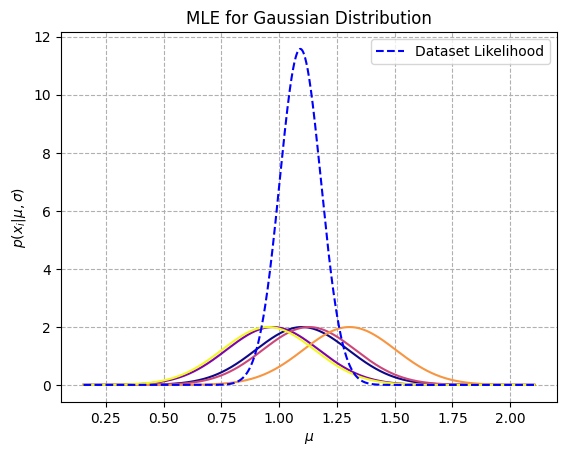

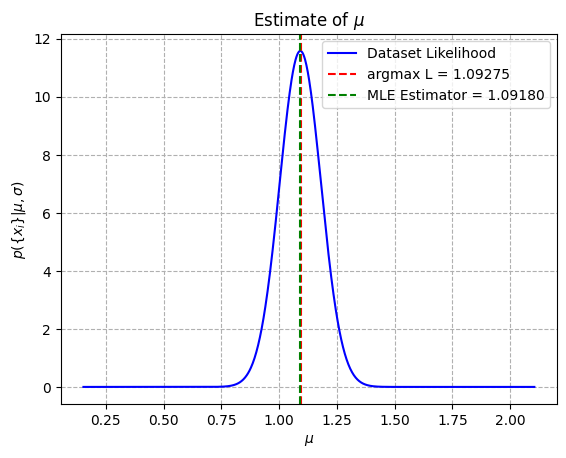

In [320]:
# Likelihood
L_i = np.array([norm.pdf(x, loc=i, scale=sigma) for i in data])

# Dataset likelihood (product of the gaussian)
L = np.prod(L_i, axis=0)
max_L = x[np.argmax(L)] # maximum of the likelihood

# MLE mean estimator
mu_MLE = data.mean()

# Plot the likelihood for each data and the dataset likelihood
colors = plt.cm.plasma(np.linspace(0, 1, N)) 
plt.figure()
for single_L, color in zip(L_i, colors):
    plt.plot(x, single_L, color=color)
plt.plot(x, L, linestyle='--', color='blue', label='Dataset Likelihood')
plt.title('MLE for Gaussian Distribution')
plt.xlabel(f'$\mu$')
plt.ylabel(f'$p(x_i|\mu,\sigma)$')
plt.grid(linestyle='--')
plt.legend()
plt.show()

# Mean estimator
plt.figure()
plt.plot(x, L, color='blue', label='Dataset Likelihood')
plt.axvline(max_L, linestyle='--', color='red', label=f'argmax L = {max_L:.5f}')
plt.axvline(mu_MLE, linestyle='--', color='green', label=f'MLE Estimator = {mu_MLE:.5f}')
plt.title(f'Estimate of $\mu$')
plt.xlabel(f'$\mu$')
plt.ylabel(r'$p(\{x_i\}|\mu,\sigma)$')
plt.grid(linestyle='--')
plt.legend()
plt.show()

## Part 2

Check the Fisher matrix error estimate makes sense:
- do a rough $2^{nd}$ order differentation of our log-likelihood function with np.diff,
- divide through by our $\Delta \theta^2$ to get the correct normalization,
- multiply by -1,
- then take the square root.
- Compare with the Fisher matrix error derived above
- Plot a Gaussian at the measured $\mu$ with this error as the scale to see if it matches the numerical likelihood distribution. (The normalization won't be captured, you can rescale it as you like to check it agrees)

In [321]:
# Define the log-likelihood
log_L = np.log(L)

# Compute the Fisher Matrix
dx = x[1] - x[0]
F = (-np.diff(log_L, n=2) / dx**2)[np.argmax(L)]
sigma_F = np.sqrt(F**(-1))
print(f'Fisher Information: σ_F = {sigma_F:.5f}')

# MLE estimator
sigma_MLE = sigma / np.sqrt(N)
print(f'MLE Estimator:    σ_MLE = {sigma_MLE:.5f}')

Fisher Information: σ_F = 0.08944
MLE Estimator:    σ_MLE = 0.08944


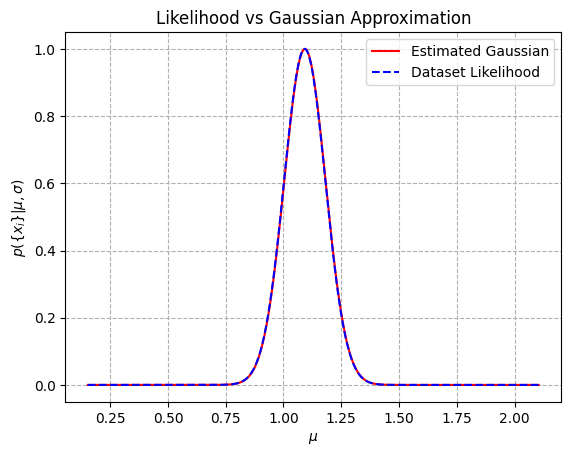

In [322]:
# Plot a Gaussian at the measured mu with this error as the scale to see if it matches the numerical likelihood distribution 
gaussian_approx = stats.norm.pdf(x, max_L, sigma_F)
gaussian_normalized = gaussian_approx / np.max(gaussian_approx)  # Normalize the Gaussian

plt.figure()
plt.plot(x, gaussian_normalized, color='red', label='Estimated Gaussian')
plt.plot(x, L / np.max(L), linestyle='--', color='blue', label='Dataset Likelihood')
plt.xlabel('$\mu$') 
plt.ylabel(r'$p(\{x_i\}|\mu,\sigma)$') 
plt.title('Likelihood vs Gaussian Approximation')
plt.legend()
plt.grid(linestyle='--')
plt.show()

## Part 3

Let's make our model more realistic. Our N measurements were taken in different nights, where the sky behaved differently (i.e. errors are heteoscedastic). Let's assume that each measurment has a $\sigma_i$ that is normally distributed with mean 0.2 and standard deviation 0.5

- Generalize your code from above to this case

In [323]:
mu = 1
sigma = 0.2
sigma_std = 0.05

N = 5

# Generate the sigma_i for each measurment
sigma_i = np.random.normal(sigma, sigma_std, N)

# Generate data
np.random.seed(42)
data = np.random.normal(mu, sigma_i)

# Define the x grid
x = np.linspace(np.min(data) - 4 * np.max(sigma_i), np.max(data) + 4 * np.max(sigma_i), 1000)

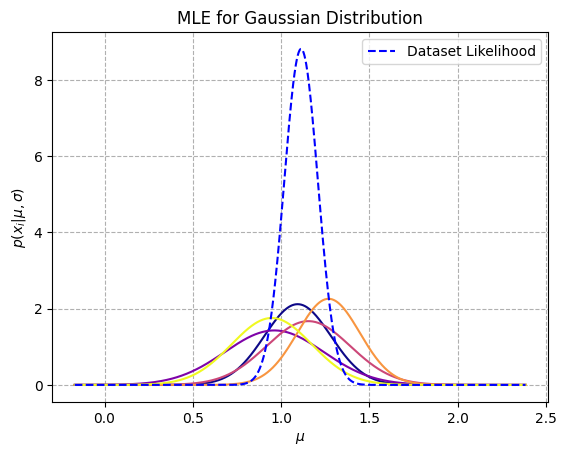

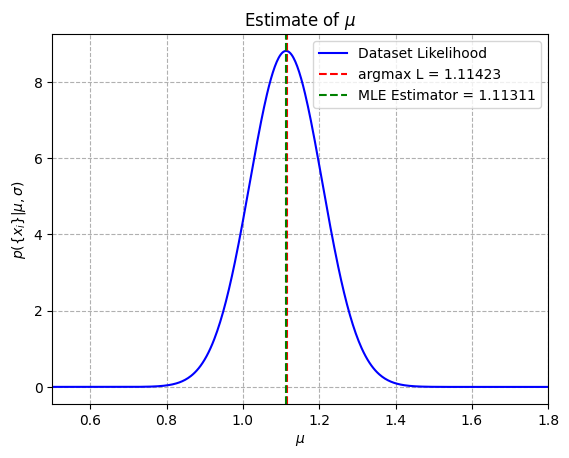

In [324]:
# Likelihood
L_i = np.array([norm.pdf(x, loc=mu_i, scale=s_i) for mu_i, s_i in zip(data, sigma_i)])

# Dataset likelihood (product of the gaussian)
L = np.prod(L_i, axis=0)
max_L = x[np.argmax(L)] # maximum of the likelihood

# MLE mean estimator
mu_MLE = np.average(data, weights=1/sigma_i**2)

# Plot the likelihood for each data and the dataset likelihood
colors = plt.cm.plasma(np.linspace(0, 1, N)) 
plt.figure()
for single_L, color in zip (L_i, colors):
    plt.plot(x, single_L, color=color)
plt.plot(x, L, linestyle='--', color='blue', label='Dataset Likelihood')
plt.title('MLE for Gaussian Distribution')
plt.xlabel(f'$\mu$')
plt.ylabel(f'$p(x_i|\mu,\sigma)$')
plt.grid(linestyle='--')
plt.legend()
plt.show()

# Mean estimator
plt.figure()
plt.xlim(0.5, 1.8)
plt.plot(x, L, color='blue', label='Dataset Likelihood')
plt.axvline(max_L, linestyle='--', color='red', label=f'argmax L = {max_L:.5f}')
plt.axvline(mu_MLE, linestyle='--', color='green', label=f'MLE Estimator = {mu_MLE:.5f}')
plt.title(f'Estimate of $\mu$')
plt.xlabel(f'$\mu$')
plt.ylabel(r'$p(\{x_i\}|\mu,\sigma)$')
plt.grid(linestyle='--')
plt.legend()
plt.show()

In [325]:
# Define the log-likelihood
log_L = np.log(L)

# Compute the Fisher Matrix
dx = x[1] - x[0]
F = (-np.diff(log_L, n=2) / dx**2)[np.argmax(L)]
sigma_F = np.sqrt(F**(-1))
print(f'Fisher Information: σ_F = {sigma_F:.5f}')

# MLE estimator
sigma_MLE = 1/np.sqrt(np.sum(1/sigma_i**2))
print(f'MLE Estimator:    σ_MLE = {sigma_MLE:.5f}')

Fisher Information: σ_F = 0.09529
MLE Estimator:    σ_MLE = 0.09529


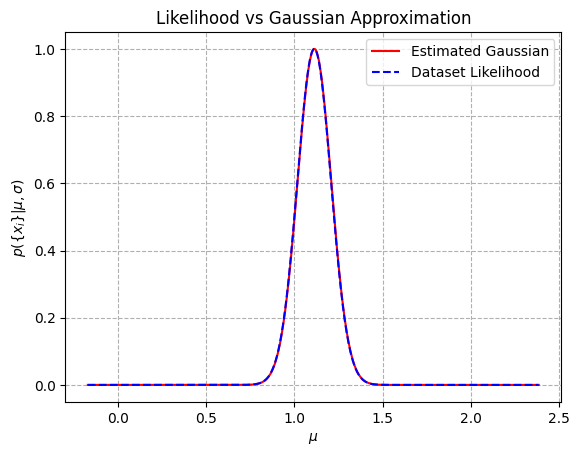

In [326]:
# Plot a Gaussian at the measured mu with this error as the scale to see if it matches the numerical likelihood distribution 
gaussian_approx = stats.norm.pdf(x, max_L, sigma_F)
gaussian_normalized = gaussian_approx / np.max(gaussian_approx)  # Normalize the Gaussian

plt.figure()
plt.plot(x, gaussian_normalized, color='red', label='Estimated Gaussian')
plt.plot(x, L / np.max(L), linestyle='--', color='blue', label='Dataset Likelihood')
plt.xlabel('$\mu$') 
plt.ylabel(r'$p(\{x_i\}|\mu,\sigma)$')
plt.title('Likelihood vs Gaussian Approximation')
plt.legend()
plt.grid(linestyle='--')
plt.show()